<a href="https://colab.research.google.com/github/kotgirep/clusteringalgos/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set: Covid 19 patients data set downloaded from Kaggle.

Business value: Helpful for people or organizations who are keeping track of covid 19 patients record.( like hospitals )

In this assignment, I am applying Gaussian mixture model algoritham to my covid19 patients dataset and selectiong other algoritham which is Birch and in the last comparing this recent clustering with previous k-means.

Importing Libraries

In [ ]:
# Import the required libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

Reading csv file

In [ ]:
#Read the data from csv file
df = pd.read_csv('/content/covid.csv',sep=',')
#Read data from file
df = df.sample(n=10000,random_state=24)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
245412,75706,7/29/20,Port Quarantine,Japan,4/2/21 15:13,582,1,236
63795,290545,5/9/21,Alaska,US,5/10/21 4:20,68880,349,0
122512,277025,4/21/21,Kurgan Oblast,Russia,4/22/21 4:20,20037,374,18615
151705,114848,9/20/20,NaN,Tunisia,4/2/21 15:13,10732,159,2386
22187,198849,1/9/21,Chhattisgarh,India,4/2/21 15:13,288570,3484,275812


Get data information from dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 245412 to 87867
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              10000 non-null  int64 
 1   ObservationDate  10000 non-null  object
 2   Province/State   7458 non-null   object
 3   Country/Region   10000 non-null  object
 4   Last Update      10000 non-null  object
 5   Confirmed        10000 non-null  int64 
 6   Deaths           10000 non-null  int64 
 7   Recovered        10000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 703.1+ KB


Check missing values in a given series

In [ ]:
df.isnull().mean() * 100

SNo                 0.00
ObservationDate     0.00
Province/State     25.42
Country/Region      0.00
Last Update         0.00
Confirmed           0.00
Deaths              0.00
Recovered           0.00
dtype: float64

Drop the missing values

In [ ]:
df = pd.DataFrame.dropna(df,axis=0,how='any')

Confirm if the missing fields are dropped.

In [ ]:
df.isnull().mean() * 100

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64

In [ ]:
df['Country/Region'].unique()

array(['Japan', 'US', 'Russia', 'India', 'Denmark', 'Spain', 'Germany',
       'Mainland China', 'Brazil', 'UK', 'France', 'Chile', 'Mexico',
       'Sweden', 'Ukraine', 'Belgium', 'Colombia', 'Italy', 'Peru',
       'Netherlands', 'Canada', 'Macau', 'Australia', 'Pakistan',
       'Hong Kong', 'China', 'Others', 'Taiwan'], dtype=object)

In [ ]:
df.shape

(7458, 8)

In [ ]:
df_without_lb = df.drop(['Country/Region'], axis=1)

Encoding the categorical feature to numerical

In [ ]:

df_without_lb.loc[:,'Province/State'] = LabelEncoder().fit_transform(df.loc[:,'Province/State'].copy())
df_without_lb.loc[:,'Country/Region'] = LabelEncoder().fit_transform(df.loc[:,'Country/Region'].copy())
df_without_lb.loc[:,'Last Update'] = LabelEncoder().fit_transform(df.loc[:,'Last Update'].copy())
df_without_lb.loc[:,'ObservationDate'] = LabelEncoder().fit_transform(df.loc[:,'ObservationDate'].copy())

df_without_lb

,SNo,ObservationDate,Province/State,Last Update,Confirmed,Deaths,Recovered,Country/Region
245412,75706,413,416,155,582,1,236,13
63795,290545,361,9,193,68880,349,0,26
122512,277025,269,262,161,20037,374,18615,21
22187,198849,35,101,155,288570,3484,275812,11
40689,24075,306,354,155,140289,9340,0,26
...,...,...,...,...,...,...,...,...
122116,212017,20,279,155,20182,358,16197,21
275446,190757,118,418,155,94,0,89,3
228180,164569,84,164,155,1100,11,0,23
234976,254833,212,255,155,910,19,883,13


In [ ]:
df_without_lb_np  = df_without_lb.to_numpy()
df_without_lb_np.shape

(7458, 8)

In [ ]:
# Selecting top 10 features using chi2 score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_top10=SelectKBest(chi2,k=8)
chi2_test=chi2_top10.fit_transform(df_without_lb,df['Country/Region'])

In [ ]:
chi2_test.shape

(7458, 8)

In [ ]:
df['Country/Region'].unique()

array(['Japan', 'US', 'Russia', 'India', 'Denmark', 'Spain', 'Germany',
       'Mainland China', 'Brazil', 'UK', 'France', 'Chile', 'Mexico',
       'Sweden', 'Ukraine', 'Belgium', 'Colombia', 'Italy', 'Peru',
       'Netherlands', 'Canada', 'Macau', 'Australia', 'Pakistan',
       'Hong Kong', 'China', 'Others', 'Taiwan'], dtype=object)

Applying Elbow method to find out number of k number of cluster

Text(0.5, 1.0, 'Elbow method to find out k number of clusters')

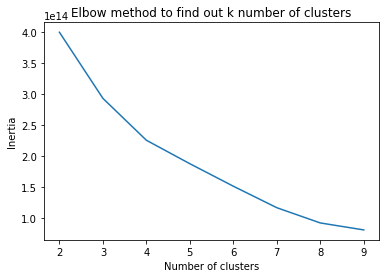

In [ ]:
# Applying elbow method to see how many clusters would be a good fit for the dataset
sc = [KMeans(n_clusters=i+2).fit(X_chi2_top10).inertia_ for i in range(8)]
sns.lineplot(np.arange(2,10),sc)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Elbow method to find out k number of clusters")

GMM Clustering on the features using chi square test

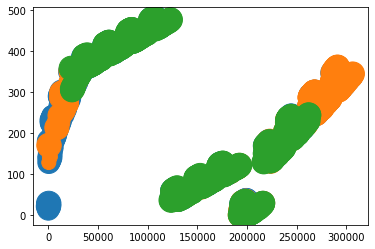

In [ ]:
# GMM Clustering on the features extracted using chi2 test
from sklearn.mixture import GaussianMixture
import numpy 
import matplotlib
import matplotlib.pyplot as plt

gmm=GaussianMixture(n_components=3)
gmm.fit(X_chi2_top10)

#pregmmdictions from gmm
lbl = gmm.predict(chi2_test)
df_gmm = pd.DataFrame(lbl)
df_gmm
clusters = numpy.unique(df_gmm)
# create scatter plot for samples from each cluster
for clst in clusters:
	# retrievet index of row for samples with this cluster
	row_index = numpy.where(df_gmm == clst)
	# creating scatter of the samples from features first,second and third
	matplotlib.pyplot.scatter(chi2_test[row_index, 0], chi2_test[row_index, 1],chi2_test[row_index, 2])
# draw a plot using matplot library
matplotlib.pyplot.show()

Finding out silhouette score for cluster=3 and gaussian model with chi square test

In [ ]:
from sklearn.metrics import  silhouette_score
sil_avg = silhouette_score(chi2_test, df_gmm[0])
print("For n_clusters = 3 and GaussianMixture model with chi2 test","The silhouette_score is :", sil_avg)

For n_clusters = 3 and GaussianMixture model with chi2 test The silhouette_score is : -0.0207218241646281


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(df['Country/Region'],df_gmm[0])

0.04449188123828578

Applying Birch clustering on top features using chi square test

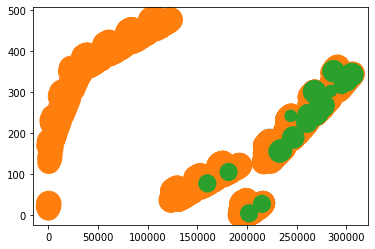

In [ ]:

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
bmdl = Birch(threshold=0.01, n_clusters=3)
# fit the model
bmdl.fit(chi2_test)
# assign a cluster to each example
yhat = bmdl.predict(chi2_test)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster from features 1,2,3
	row_index = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(chi2_test[row_index, 0], chi2_test[row_index, 1],chi2_test[row_index, 2])
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import  silhouette_score
sil_avg2 = silhouette_score(chi2_test, yhat)
print("For n_clusters = 3 and Birch model selected using chi2 test","The value of silhouette_score is :", sil_avg2)

For n_clusters = 3 and Birch model selected using chi2 test The value of silhouette_score is : 0.7947377159698801


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(df['Country/Region'],yhat)

0.00019341638289860705

Getting top correlated features

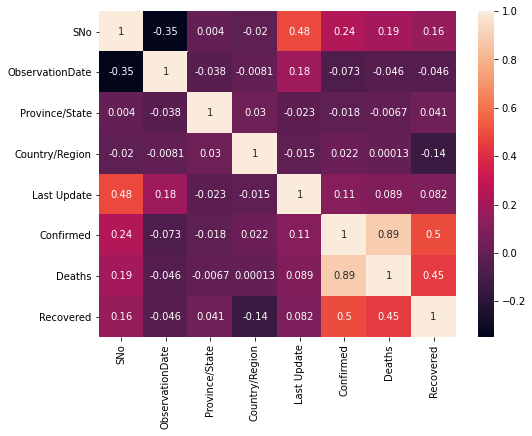

In [ ]:
# Retrieving top correlated features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_data_encoded=df
df_data_encoded.loc[:,'Province/State'] = LabelEncoder().fit_transform(df.loc[:,'Province/State'].copy())
df_data_encoded.loc[:,'Country/Region'] = LabelEncoder().fit_transform(df.loc[:,'Country/Region'].copy())
df_data_encoded.loc[:,'Last Update'] = LabelEncoder().fit_transform(df.loc[:,'Last Update'].copy())
df_data_encoded.loc[:,'ObservationDate'] = LabelEncoder().fit_transform(df.loc[:,'ObservationDate'].copy())


cor_ft=df_data_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor_ft,annot=True)
cor_ft=df_data_encoded.corr()

In [ ]:
#Selecting highly correlated features
cor_target = abs(cor_ft['Country/Region'])
relevant_features = cor_target[cor_target>=0.02]
top_feat=list(relevant_features.index)
top_feat.remove('Country/Region')

In [ ]:
top_feat

['Province/State', 'Confirmed', 'Recovered']

In [ ]:
df_corr=df_without_lb[top_feat]

In [ ]:
df_corr

,Province/State,Confirmed,Recovered
245412,416,582,236
63795,9,68880,0
122512,262,20037,18615
22187,101,288570,275812
40689,354,140289,0
...,...,...,...
122116,279,20182,16197
275446,418,94,89
228180,164,1100,0
234976,255,910,883


In [ ]:
df_corr=df_corr.to_numpy()

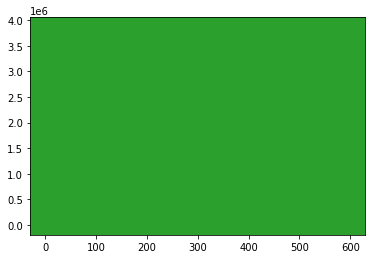

In [ ]:
# Applying BIRCH on top 10 features selected based on correlation
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
bmodel = Birch(threshold=0.02, n_clusters=3)
# fit the model
bmodel.fit(df_corr)
# allocate a cluster to each and every example
yhat2 = bmodel.predict(df_corr)
# getting the unique clusters
gaussianclst2 = unique(yhat2)
# create scatter plot for samples from each cluster
for cluster in gaussianclst2:
	# retrieve row indexes for samples with this cluster
	row_index4 = where(yhat2 == cluster)
	# create scatter of these samples
	pyplot.scatter(df_corr[row_index4, 0], df_corr[row_index4, 1],df_corr[row_index4, 2])
# draw the plot
pyplot.show()

In [ ]:
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(X_chi2_top10, yhat2)
print("For n_clusters = 3 and Birch model on top of highly correlated features ","The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 and Birch model on top of highly correlated features  The average silhouette_score is : 0.7281642638498632


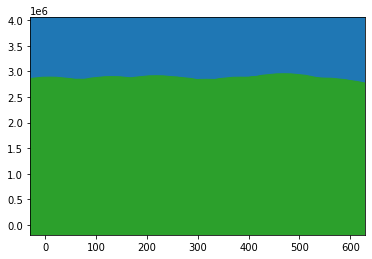

In [ ]:
# GMM Clustering on top 10 features selected based on correlation
gmcluster2 = GaussianMixture(n_components=3)
gmcluster2.fit(df_corr)

#predictions from gmm
lbls2 = gmcluster2.predict(df_corr)
df_gmm_label2 = pd.DataFrame(lbls2)
df_gmm_label2
gaussiancluster = unique(df_gmm_label2)
# create scatter plot for samples from each cluster
for cluster in gaussiancluster:
	# get row indexes for samples with this cluster
	row_index2 = where(df_gmm_label2 == cluster)
	# create scatter of these samples
	pyplot.scatter(df_corr[row_index2, 0], df_corr[row_index2, 1],df_corr[row_index2, 2])
# show the plot
pyplot.show()

 **Findings**

---



As we can see in above steps, completely different clusters are created with feature selected using correlation and chi2 test. 
